# Classification model using Random Forest

### 1. Import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

### 2. Upload RNA data

In [7]:
path ='C:/Users/sandr/Documents/ART_project/GNN model/Data/PPT-Ohmnet/mRCC_big_pool/Second big pool/mrcc_protein_matrix_2776_genes_839_nodes.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,ABCB1,ABCB6,ABCG2,ABL2,ACADM,ACD,ACE,ACE2,ACHE,...,XRCC6,YAP1,YBX1,YBX3,YY1,ZBTB17,ZHX2,ZMIZ1,ZMPSTE24,Y
0,0,36.716012,33.867624,29.676682,32.862716,35.061520,31.801427,31.988036,30.172489,29.912204,...,35.24634,33.97677,37.51551,35.75761,33.53412,31.72285,33.23150,32.38760,32.22373,1
1,1,34.174577,32.703008,31.318871,33.061603,35.908450,31.878071,33.015718,33.634947,26.076400,...,35.91455,34.75610,36.67356,35.85355,34.44291,31.63512,32.63491,33.78434,32.19111,1
2,2,31.225510,34.522351,30.612181,32.658413,34.370223,31.425178,31.714695,26.858096,27.589284,...,36.05801,34.48484,36.41164,35.24518,35.14050,31.99899,34.31359,32.95630,32.77568,1
3,3,32.988641,33.059035,31.973489,33.014431,35.824161,31.829645,32.916062,29.565514,28.143610,...,35.75676,35.27953,36.58061,36.19379,34.96911,31.28469,33.03073,33.88207,32.46805,0
4,4,33.284849,31.488348,30.774368,33.793065,34.332987,32.020127,31.824945,28.767942,26.537023,...,36.33015,34.50745,36.89459,34.95292,34.76483,33.40109,32.15993,33.35772,31.64157,1


In [8]:
X = data.iloc[:,1:839  ] 
Y = []
for i in range (len(data)):
    if data.Y[i]==0: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
print(X)
print('Numero de pacientes: ',len(Y))

         ABCB1      ABCB6      ABCG2       ABL2      ACADM        ACD  \
0    36.716012  33.867624  29.676682  32.862716  35.061520  31.801427   
1    34.174577  32.703008  31.318871  33.061603  35.908450  31.878071   
2    31.225510  34.522351  30.612181  32.658413  34.370223  31.425178   
3    32.988641  33.059035  31.973489  33.014431  35.824161  31.829645   
4    33.284849  31.488348  30.774368  33.793065  34.332987  32.020127   
..         ...        ...        ...        ...        ...        ...   
176  33.838323  32.296025  30.740420  33.040376  34.981970  31.823358   
177  31.895951  33.784466  29.347511  31.571621  34.865097  29.786302   
178  33.842290  32.838072  29.862937  33.491465  34.379400  31.246333   
179  34.715293  32.561403  29.292590  33.151894  34.802123  32.344355   
180  32.476530  32.316413  26.957145  33.580139  34.950670  32.959610   

           ACE       ACE2       ACHE       ACO2  ...     XRCC4     XRCC6  \
0    31.988036  30.172489  29.912204  35.812113

### 3. Train-Test dataset split

In [9]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [10]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [11]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(criterion='entropy', min_samples_leaf=3, n_estimators=20,
                       random_state=125)

In [12]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5761083743842365


### 5. Prediction

In [13]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [14]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [15]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.9930555555555556
Final accuracy on the testing dataset: 0.40540540540540543


In [16]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[67  1]
 [ 0 76]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]


In [17]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        68
           1       0.99      1.00      0.99        76

    accuracy                           0.99       144
   macro avg       0.99      0.99      0.99       144
weighted avg       0.99      0.99      0.99       144



In [18]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[ 6 11]
 [11  9]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0]


In [19]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.35      0.35      0.35        17
           1       0.45      0.45      0.45        20

    accuracy                           0.41        37
   macro avg       0.40      0.40      0.40        37
weighted avg       0.41      0.41      0.41        37



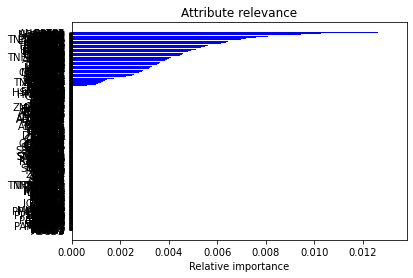

ABCB1 = 0.0
ABCB6 = 0.0
ABCG2 = 0.0
ABL2 = 0.0
ACADM = 0.0
ACD = 0.0
ACE = 0.0
ACE2 = 0.0
ACHE = 0.005766561657012227
ACO2 = 0.0
ACTA2 = 0.0022240394902493387
ACTG1 = 0.0
ACTN4 = 0.0
ACVR1 = 0.0
ACVRL1 = 0.0
ADA = 0.0
ADAM10 = 0.004022642607619366
ADAM17 = 0.0012888331270983267
ADAM9 = 0.0
ADAMTS1 = 0.0
ADIPOR1 = 0.0
ADM = 0.0022056758417366715
ADORA1 = 0.002614528102046254
ADORA2A = 0.0
ADRA1A = 0.0
AGFG1 = 0.0
AGT = 0.0
AGTR1 = 0.0035961921673814483
AHR = 0.0
AHSA1 = 0.007992208467247356
AKR1C1 = 0.006914804639951621
AKT1 = 0.0
AKT1S1 = 0.0007746475478639656
AKT2 = 0.0
ALAD = 0.00432572762308659
ALDH9A1 = 0.0
ALDOA = 0.0012787924953185314
ALDOB = 0.0
ALOX12 = 0.0
ALOX5 = 0.0
AMFR = 0.0
AMOT = 0.0
ANG = 0.002685908157230232
ANGPT1 = 0.002215988343026824
ANGPT2 = 0.0
ANGPT4 = 0.0
ANGPTL3 = 0.012649460053285794
ANXA1 = 0.0
ANXA2 = 0.0
ANXA6 = 0.0
APAF1 = 0.002684513033115176
APC = 0.0
APEX1 = 0.0
APH1A = 0.0
APLP2 = 0.003705830405595565
APOE = 0.0
AQP1 = 0.0
AQP4 = 0.0
AR = 0.0
ARG2 = 0

In [20]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.